Example

In [159]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [160]:
data = pd.read_csv("example.csv")

In [161]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014,Corolla


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [163]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [164]:
data = data.drop(["Model"], axis = 1)

In [165]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


In [166]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [167]:
data_no_mv = data.dropna(axis= 0)

In [168]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [169]:
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.00,4025.00,4025.00,4025.00
mean,19552.31,163.57,2.76,2006.38
std,25815.73,103.39,4.94,6.70
min,600.00,0.00,0.60,1969.00
25%,6999.00,90.00,1.80,2003.00
50%,11500.00,158.00,2.20,2007.00
75%,21900.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


Exploring the PDFs

/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

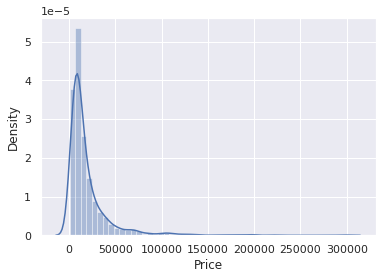

In [170]:
sns.distplot(data_no_mv["Price"])

Dealing with outliers

In [171]:
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"]<q]

In [172]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

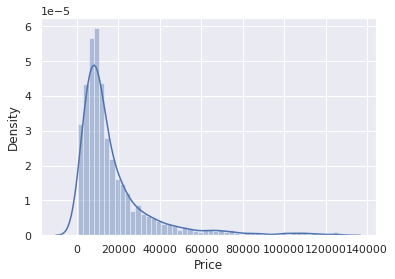

In [232]:
sns.distplot(data_1["Price"])

/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

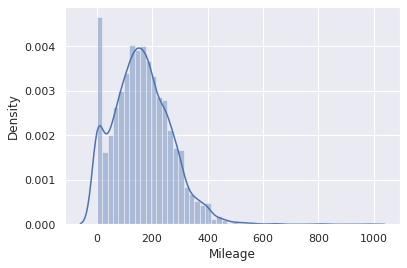

In [174]:
sns.distplot(data_no_mv["Mileage"])

In [175]:
q = data_1["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q]

/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

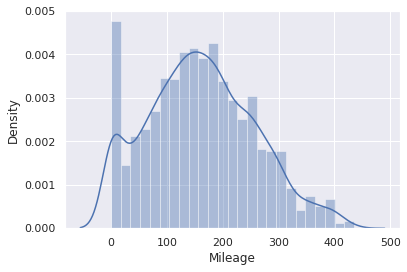

In [233]:
sns.distplot(data_2["Mileage"])

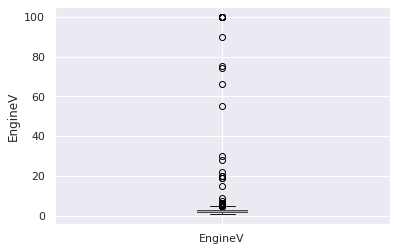

In [235]:
data_2.boxplot(column = "EngineV")
plt.ylabel("EngineV")
plt.show()

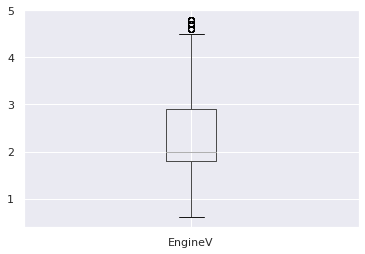

In [236]:
data_3 = data_2[data_2["EngineV"]<5]
data_3.boxplot(column = "EngineV")
plt.show()

In [244]:
data_3 = data_2[data_2["EngineV"]<6.5] #the value was 6.5

In [245]:
EngV = pd.DataFrame(data_3['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
2646,1.00
2508,1.00
2196,1.00
...,...
3365,6.30
632,6.30
3941,6.30
3695,6.30


/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

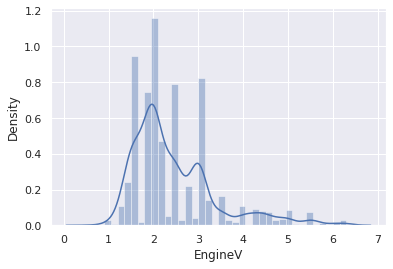

In [246]:
sns.distplot(data_3["EngineV"])

In [247]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

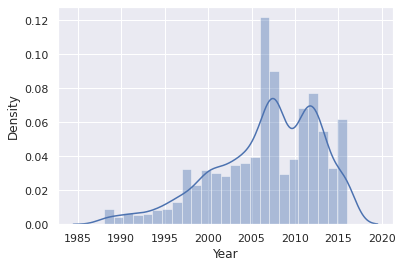

In [248]:
sns.distplot(data_4['Year'])

In [251]:
data_cleaned = data_4

In [250]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


In [252]:
data_cleaned.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

#Checking the OLS assumptions

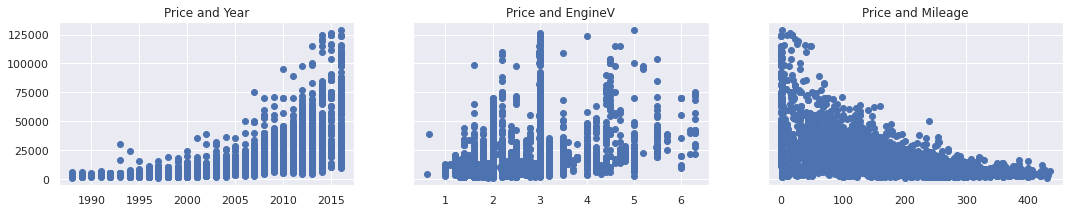

In [253]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True,figsize = (18,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

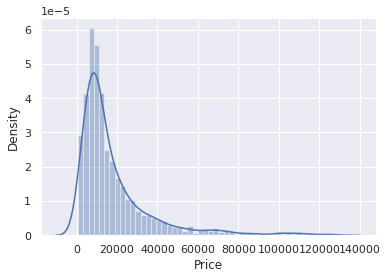

In [254]:
sns.distplot(data_cleaned['Price'])

In [255]:
log_price = np.log(data_cleaned['Price'])

In [256]:
data_cleaned['log_price'] = log_price
data_cleaned

/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


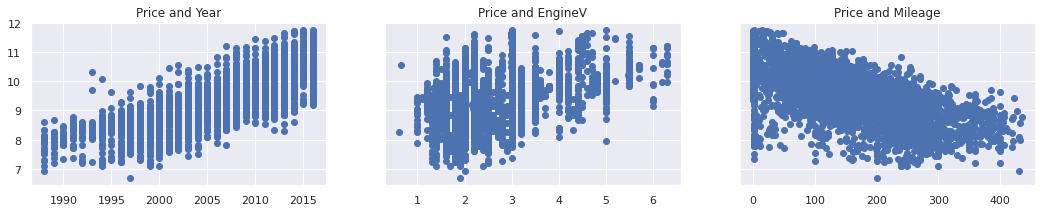

In [257]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True,figsize = (18,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

Multicolinearity

In [192]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif["VIF"] =[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])] 
vif["features"] = variables.columns

In [194]:
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [195]:
data_no_multicollinearity = data_cleaned.drop(["Year"], axis = 1)

In [196]:
data_no_multicollinearity 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,9.81
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,9.35
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,9.79
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,11.74
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,8.78


Create dummy variables

In [197]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity ,drop_first=True)

In [198]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.00,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.00,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.00,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.00,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.00,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearange a bit

In [199]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [200]:
cols = ['Brand_BMW','Price', 'Mileage', 'EngineV', 'log_price',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [201]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Brand_BMW,Price,Mileage,EngineV,log_price,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1,4200.00,277,2.00,8.34,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,0,7900.00,427,2.90,8.97,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,13300.00,358,5.00,9.50,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,23000.00,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,18300.00,120,2.00,9.81,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Lienar Regression Model

In [202]:
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [204]:
inputs_scaled = scaler.transform(inputs)

In [259]:
inputs_scaled

array([[ 2.27971827, -0.73333185,  1.2179077 , ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.43865069, -0.53944594,  2.78660201, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-0.43865069, -0.2564773 ,  2.06500263, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-0.43865069,  5.59678128, -1.58482613, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.27971827, -0.61280817, -1.66848982, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.43865069, -0.24599698, -0.38216049, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [260]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

In [261]:
x_train

array([[-0.43865069, -0.34031986,  0.25577519, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.43865069, -0.45560338, -0.86322675, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-0.43865069, -0.35080018, -0.4344503 , ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-0.43865069,  0.12081421,  0.64271979, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.43865069, -0.82241457,  1.24928159, ...,  6.16932785,
        -0.75037043, -3.11164272],
       [-0.43865069,  0.92779883, -0.58086177, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [262]:
reg = LinearRegression().fit(x_train,y_train)

In [263]:
y_hat = reg.predict(x_train)

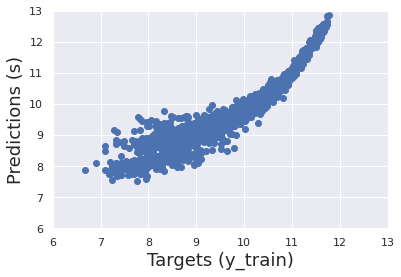

In [264]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (s)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/home/solomon/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

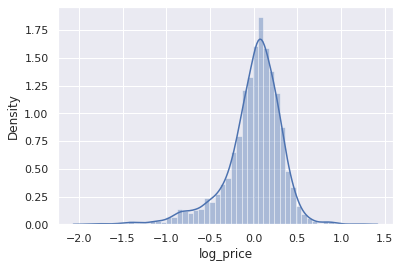

In [265]:
sns.distplot(y_train - y_hat)

In [266]:
reg.score(x_train, y_train)

0.8613387128149418

#Finding the weight and bias

In [212]:
reg.intercept_

9.417887576235454

In [213]:
reg.coef_

array([ 0.002997  ,  0.47016103, -0.20613177,  0.10134996, -0.01018191,
       -0.06544045, -0.09865781, -0.0119512 , -0.0356834 , -0.07932256,
       -0.03509751, -0.09525154, -0.0571305 , -0.0705021 , -0.04685037,
       -0.01234463, -0.05755958,  0.25218298])

In [214]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Brand_BMW,0.00
1,Price,0.47
2,Mileage,-0.21
3,EngineV,0.10
4,Brand_Mercedes-Benz,-0.01
5,Brand_Mitsubishi,-0.07
6,Brand_Renault,-0.10
7,Brand_Toyota,-0.01
8,Brand_Volkswagen,-0.04
9,Body_hatch,-0.08


In [215]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [216]:
y_hat_test = reg.predict(x_test)

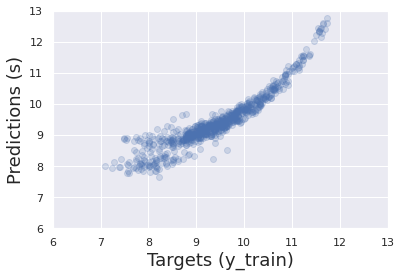

In [217]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (s)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [218]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])

In [219]:
df_pf.head()

,Prediction
0,7671.68
1,3451.85
2,6583.72
3,7567.87
4,9322.90


In [220]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7671.68,NaN
1,3451.85,7900.00
2,6583.72,NaN
3,7567.87,NaN
4,9322.90,NaN
5,17439.82,NaN
6,26634.70,NaN
7,16279.62,14200.00
8,11262.58,NaN
9,35712.10,NaN


In [221]:
y_test

1330    7.74
3782    7.94
2647    7.82
3664    8.76
995     9.12
3219    9.90
188    10.57
3376    9.74
4236    9.43
3716   10.62
1219    9.46
2374    8.52
1       8.97
844     9.74
799     9.13
3877    9.39
1023    9.93
1293    9.18
2577   10.59
2447    9.71
1821    9.63
2258   10.11
3984    8.64
2376    9.46
2862    9.95
3517   10.37
4049    8.19
1224    9.36
4017   10.69
2136   10.66
1005    8.97
3295    9.45
1848    9.90
366     9.62
2483    9.55
2217    9.95
558     9.42
1705    9.94
592     9.59
2229   10.30
1317    9.80
1871    9.70
2457   10.56
436    10.02
3526    9.55
3780    8.85
3972    8.01
2228   10.17
978    10.92
1634    8.50
646     7.70
472     8.05
3491    9.19
2387    9.95
3190    9.95
741     9.28
170     9.08
1606   10.15
3948   10.81
3162    8.94
2523    9.43
2969    8.90
1996    9.05
2729    8.10
3663    9.62
2656    9.81
533     7.74
3132    8.32
168     8.72
169     7.24
2643   11.21
1403    9.58
3100   10.02
879    10.33
1339    7.88
4022    8.61
510     8.78

In [222]:
y_test = y_test.reset_index(drop = True)

In [223]:
y_test

0      7.74
1      7.94
2      7.82
3      8.76
4      9.12
5      9.90
6     10.57
7      9.74
8      9.43
9     10.62
10     9.46
11     8.52
12     8.97
13     9.74
14     9.13
15     9.39
16     9.93
17     9.18
18    10.59
19     9.71
20     9.63
21    10.11
22     8.64
23     9.46
24     9.95
25    10.37
26     8.19
27     9.36
28    10.69
29    10.66
30     8.97
31     9.45
32     9.90
33     9.62
34     9.55
35     9.95
36     9.42
37     9.94
38     9.59
39    10.30
40     9.80
41     9.70
42    10.56
43    10.02
44     9.55
45     8.85
46     8.01
47    10.17
48    10.92
49     8.50
50     7.70
51     8.05
52     9.19
53     9.95
54     9.95
55     9.28
56     9.08
57    10.15
58    10.81
59     8.94
60     9.43
61     8.90
62     9.05
63     8.10
64     9.62
65     9.81
66     7.74
67     8.32
68     8.72
69     7.24
70    11.21
71     9.58
72    10.02
73    10.33
74     7.88
75     8.61
76     8.78
77     8.65
78    10.31
79     9.66
80     9.08
81     8.58
82     7.86
83  

In [224]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7671.68,2300.00
1,3451.85,2800.00
2,6583.72,2500.00
3,7567.87,6400.00
4,9322.90,9150.00
5,17439.82,20000.00
6,26634.70,38888.00
7,16279.62,16999.00
8,11262.58,12500.00
9,35712.10,41000.00


In [225]:
df_pf["Residual"]  = df_pf['Target'] - df_pf["Prediction"]

In [226]:
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"]*100)

In [227]:
df_pf

,Prediction,Target,Residual,Difference%
0,7671.68,2300.00,-5371.68,233.55
1,3451.85,2800.00,-651.85,23.28
2,6583.72,2500.00,-4083.72,163.35
3,7567.87,6400.00,-1167.87,18.25
4,9322.90,9150.00,-172.90,1.89
5,17439.82,20000.00,2560.18,12.80
6,26634.70,38888.00,12253.30,31.51
7,16279.62,16999.00,719.38,4.23
8,11262.58,12500.00,1237.42,9.90
9,35712.10,41000.00,5287.90,12.90


In [228]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,20139.44,18165.82,-1973.63,26.97
std,36439.99,19967.86,20246.39,37.47
min,2100.19,1200.00,-228753.40,0.11
25%,7568.93,6900.00,-1093.92,7.50
50%,10680.77,11600.00,418.99,17.29
75%,17351.02,20500.00,2784.85,28.74
max,352753.40,126000.00,15267.01,312.44


In [229]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' % x)
df_pf.sort_values(by=["Difference%"])

,Prediction,Target,Residual,Difference%
79,15717.17,15700.00,-17.17,0.11
737,26868.29,26900.00,31.71,0.12
614,15028.49,14999.00,-29.49,0.20
293,7971.98,7999.00,27.02,0.34
25,32099.70,31990.00,-109.70,0.34
763,10845.25,10800.00,-45.25,0.42
478,62276.91,62000.00,-276.91,0.45
700,19691.58,19800.00,108.42,0.55
548,39652.70,39900.00,247.30,0.62
681,4129.97,4100.00,-29.97,0.73
